<h1>Project Title: "Factors Influencing Academic Performance and Career Outcomes of College Students"</h1>

<h4><b>Step 1: Generate the Dataset<b></h4>

In [1]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 100 students
data = {
    "Age": np.random.randint(18, 25, 100),
    "Gender": np.random.choice(["Male", "Female"], 100),
    "Socioeconomic_Status": np.random.choice(["Low", "Middle", "High"], 100, p=[0.3, 0.5, 0.2]),
    "Study_Hours": np.round(np.random.normal(20, 5, 100), 1),
    "GPA": np.round(np.random.normal(3.0, 0.5, 100), 2),
    "Extracurricular_Hours": np.round(np.random.normal(5, 2, 100), 1),
    "Mental_Health_Score": np.round(np.random.normal(70, 15, 100), 1),
    "Mentorship": np.random.choice(["No Mentorship", "Faculty Mentorship", "Peer Mentorship"], 100),
    "Internship_Experience": np.random.choice([0, 1], 100, p=[0.6, 0.4]),
    "Starting_Salary": np.random.choice([30000, 40000, 50000, 60000, 70000], 100)
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head()


,Age,Gender,Socioeconomic_Status,Study_Hours,GPA,Extracurricular_Hours,Mental_Health_Score,Mentorship,Internship_Experience,Starting_Salary
0,24,Female,Middle,21.5,2.24,5.0,62.0,Peer Mentorship,1,50000
1,21,Female,Middle,16.4,2.76,3.0,58.1,No Mentorship,1,60000
2,22,Male,Low,29.3,3.63,5.0,68.4,No Mentorship,0,60000
3,24,Female,Low,22.4,2.65,4.4,54.5,Faculty Mentorship,0,70000
4,20,Male,Low,14.0,3.22,5.6,61.7,Faculty Mentorship,0,70000


<h4><b>Step 2: Univariate Statistics<b></h4>

In [2]:
# Calculate univariate statistics for numeric columns
univariate_stats = df.describe()
print("Univariate Statistics:\n", univariate_stats)

Univariate Statistics:
               Age  Study_Hours         GPA  Extracurricular_Hours  \
count  100.000000   100.000000  100.000000             100.000000   
mean    21.210000    20.720000    3.001200               5.091000   
std      1.913773     5.136717    0.454182               2.052005   
min     18.000000     9.900000    1.380000               0.800000   
25%     19.750000    16.400000    2.700000               3.500000   
50%     21.000000    21.000000    3.010000               5.050000   
75%     23.000000    23.650000    3.310000               6.400000   
max     24.000000    39.300000    4.070000               9.400000   

       Mental_Health_Score  Internship_Experience  Starting_Salary  
count           100.000000             100.000000       100.000000  
mean             67.727000               0.350000     50900.000000  
std              14.803418               0.479372     14290.987483  
min              32.900000               0.000000     30000.000000  
25%      

<h4><b>Step 3: Bivariate Associations<b></h4>

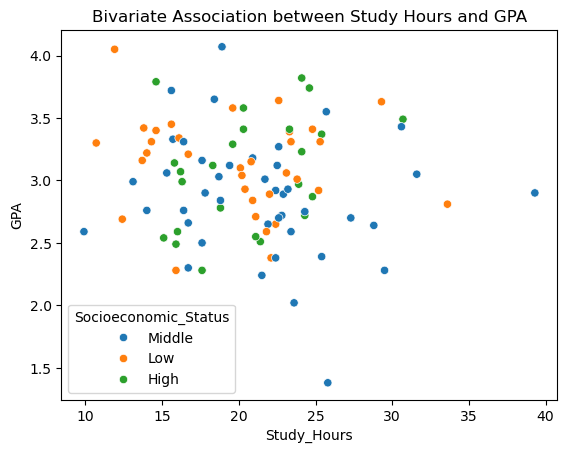

In [3]:
# Analyzing the relationship between Study_Hours and GPA
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x="Study_Hours", y="GPA", hue="Socioeconomic_Status")
plt.title("Bivariate Association between Study Hours and GPA")
plt.show()

<h4><b>Step 4: Correlation Analysis<b></h4>

Correlation Matrix:
                        Study_Hours       GPA  Extracurricular_Hours  \
Study_Hours               1.000000 -0.099739              -0.070121   
GPA                      -0.099739  1.000000               0.024333   
Extracurricular_Hours    -0.070121  0.024333               1.000000   
Mental_Health_Score       0.058760 -0.054428               0.118031   
Starting_Salary           0.133499 -0.008883               0.005790   

                       Mental_Health_Score  Starting_Salary  
Study_Hours                       0.058760         0.133499  
GPA                              -0.054428        -0.008883  
Extracurricular_Hours             0.118031         0.005790  
Mental_Health_Score               1.000000        -0.077322  
Starting_Salary                  -0.077322         1.000000  


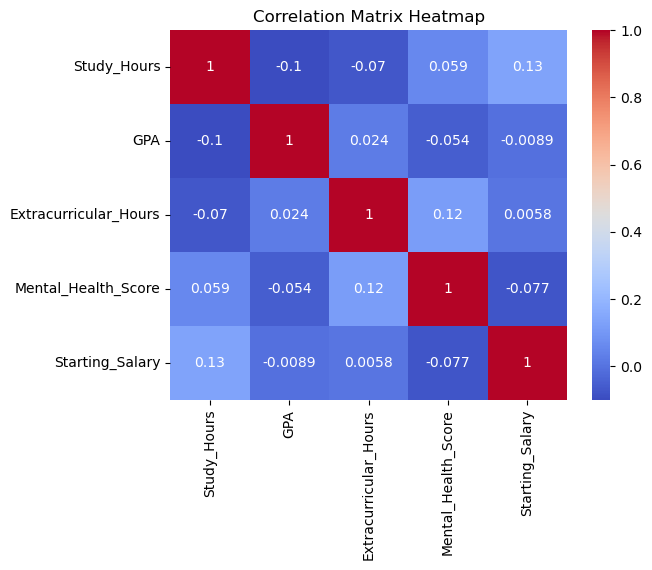

In [4]:
# Calculate correlation between continuous variables
correlations = df[["Study_Hours", "GPA", "Extracurricular_Hours", "Mental_Health_Score", "Starting_Salary"]].corr()
print("Correlation Matrix:\n", correlations)

# Heatmap for correlation matrix
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

<h4><b>Step 5: Covariance<b></h4>

In [5]:
# Calculate covariance matrix for continuous variables
covariance_matrix = df[["Study_Hours", "GPA", "Extracurricular_Hours", "Mental_Health_Score", "Starting_Salary"]].cov()
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
                        Study_Hours        GPA  Extracurricular_Hours  \
Study_Hours              26.385859  -0.232691              -0.739111   
GPA                      -0.232691   0.206281               0.022678   
Extracurricular_Hours    -0.739111   0.022678               4.210726   
Mental_Health_Score       4.468141  -0.365942               3.585397   
Starting_Salary        9800.000000 -57.656566             169.797980   

                       Mental_Health_Score  Starting_Salary  
Study_Hours                       4.468141     9.800000e+03  
GPA                              -0.365942    -5.765657e+01  
Extracurricular_Hours             3.585397     1.697980e+02  
Mental_Health_Score             219.141183    -1.635788e+04  
Starting_Salary              -16357.878788     2.042323e+08  


<h4><b>Step 6: Multivariate Analysis (Principal Component Analysis - PCA)<b></h4>

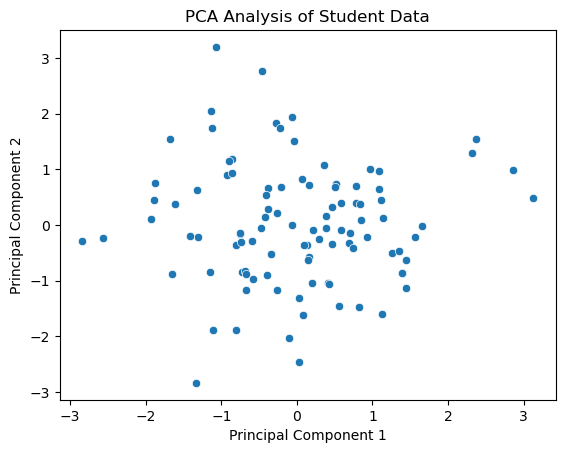

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting continuous variables for PCA
X = df[["Study_Hours", "GPA", "Extracurricular_Hours", "Mental_Health_Score", "Starting_Salary"]]
X = StandardScaler().fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
pca_df = pd.DataFrame(data=principal_components, columns=["Principal Component 1", "Principal Component 2"])

# Plot PCA results
sns.scatterplot(data=pca_df, x="Principal Component 1", y="Principal Component 2")
plt.title("PCA Analysis of Student Data")
plt.show()


<h4><b>Step 7: ANOVA Analysis<b></h4>

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA to test the effect of Mentorship type on GPA
anova_model = ols("GPA ~ C(Mentorship)", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Table:\n", anova_table)

ANOVA Table:
                   sum_sq    df         F    PR(>F)
C(Mentorship)   0.591402   2.0  1.446412  0.240445
Residual       19.830454  97.0       NaN       NaN
